In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('heart.csv', sep=',')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

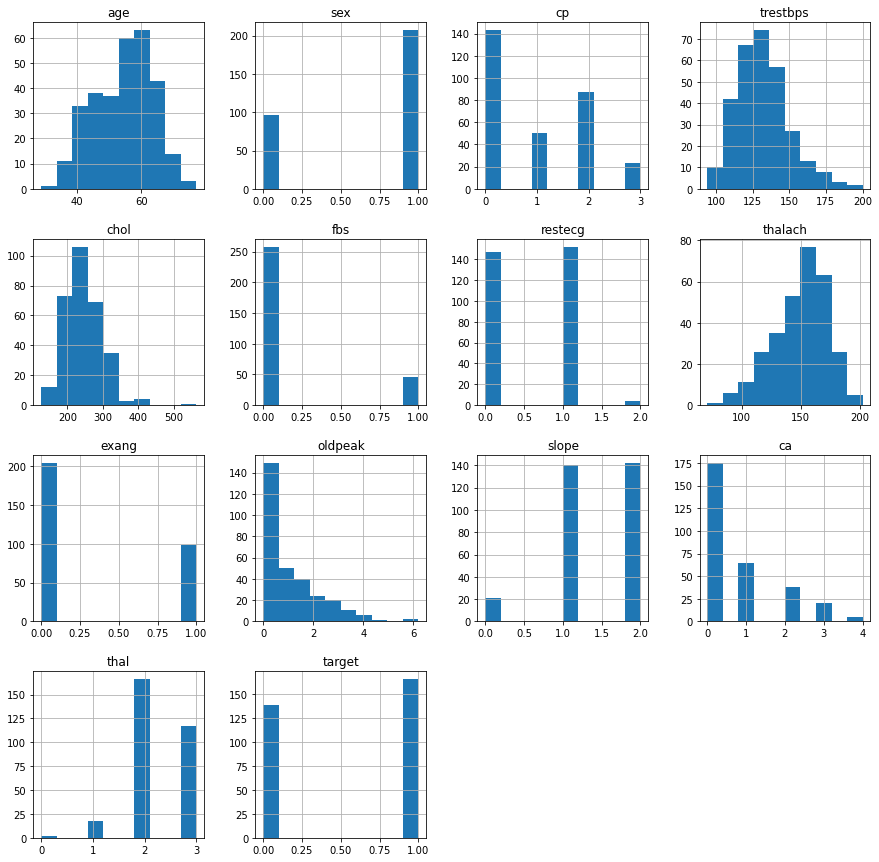

In [5]:
df.hist(figsize=(15,15))

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

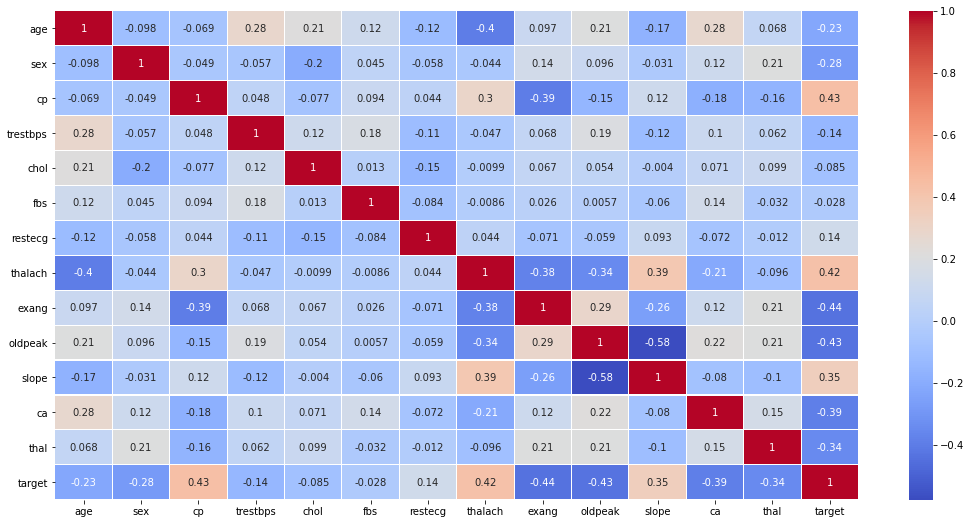

In [9]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

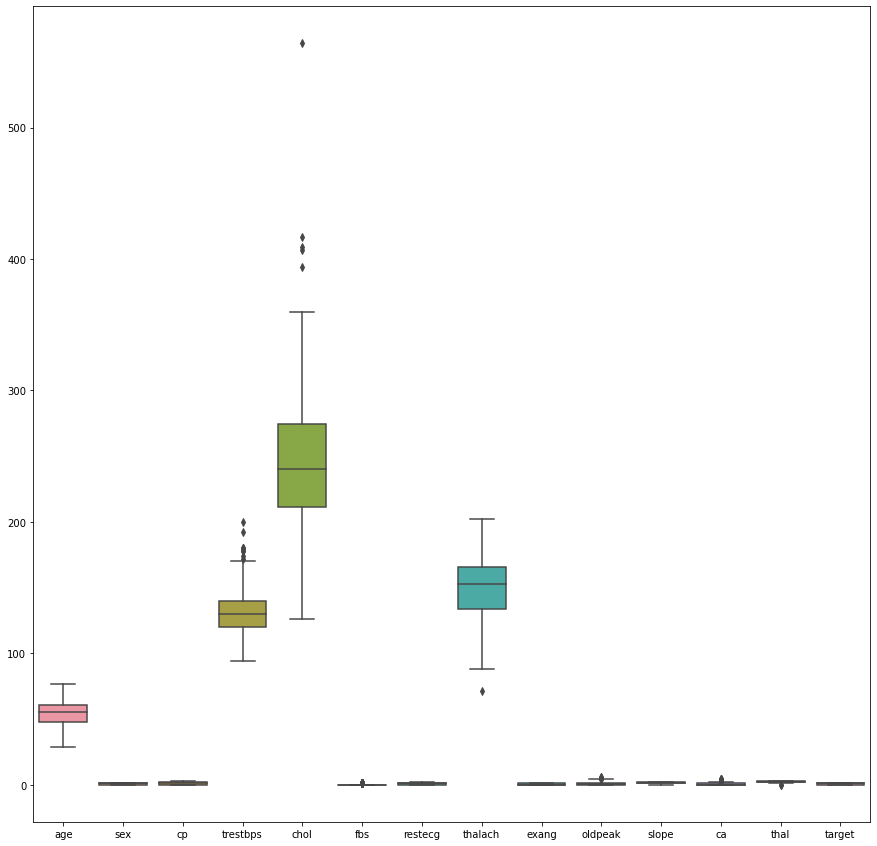

In [10]:
plt.figure(figsize=(15,15))
sns.boxplot(data=(df))
plt.show()

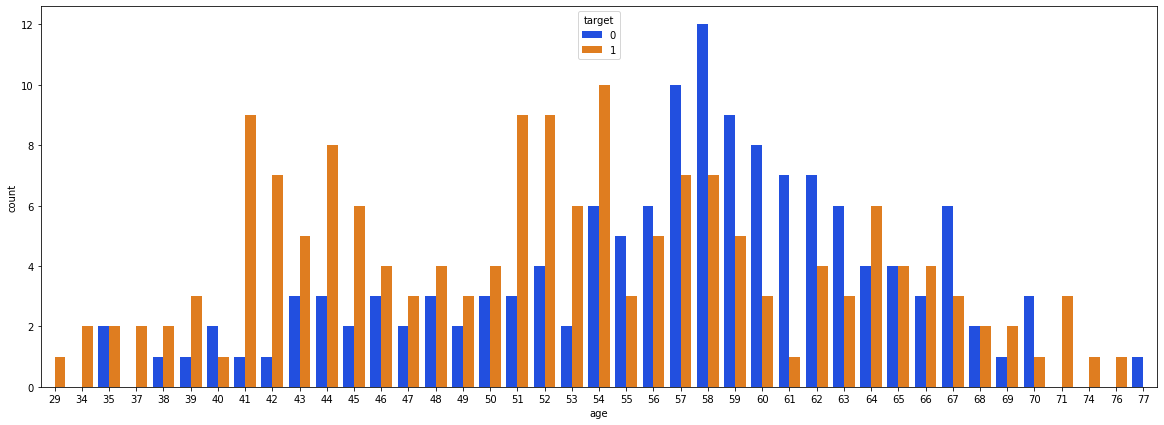

In [14]:
plt.figure(figsize=(20,7))
sns.countplot(x='age',data = df, hue ='target',palette='bright')
plt.show()

In [17]:
x=df.drop(['target'], axis=1)
y=df.target
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid=train_test_split(x,y, test_size=0.1, random_state=3, shuffle=True)
x.shape, y.shape, x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((303, 13), (303,), (272, 13), (31, 13), (272,), (31,))

# Linear regression

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [19]:
reg=linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [20]:
print('Coefficients: \n', reg.coef_) 
print('Variance score: {}'.format(reg.score(x_valid, y_valid))) 

Coefficients: 
 [-0.00141088 -0.20479675  0.10512605 -0.00283651 -0.00027479  0.06167229
  0.04732643  0.00291704 -0.15891026 -0.06215332  0.0772083  -0.09161393
 -0.1208135 ]
Variance score: 0.48278098967502514


In [21]:
pred=reg.predict(x_valid)

In [22]:
pred

array([ 0.45271021,  0.93430686,  0.59281726,  0.91321972,  0.53519478,
        1.14078702,  0.05254883, -0.19978431,  0.68879592,  0.82926166,
        0.23206304,  0.40263655,  0.51196003,  0.19308082, -0.00465749,
        0.71709693,  0.62317708,  0.28548101,  0.93141185,  0.77857603,
       -0.04932922,  0.96301895,  0.95041138,  0.66050441,  0.90168989,
        1.09950324,  1.13861693,  0.67704181,  0.89722644,  0.28332565,
        0.76046411])

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sklearn

In [26]:
print('mse: ', sklearn.metrics.mean_squared_error(y_valid, pred), '\n', 'mae: ', sklearn.metrics.mean_absolute_error(y_valid, pred), '\n', 'R2: ', sklearn.metrics.r2_score(y_valid, pred))

mse:  0.12271169027481196 
 mae:  0.271733936595965 
 R2:  0.48278098967502514


# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log=LogisticRegression()

In [29]:
log.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
pred_log=log.predict(x_valid)

In [31]:
pred_log

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score, precision_score,  recall_score

In [33]:
acc_log=accuracy_score(y_valid, pred_log)
pre_log=precision_score(y_valid, pred_log)
rec_log=recall_score(y_valid, pred_log)

In [34]:
print('accuracy: ', acc_log , '\n', 'Precision: ', pre_log, '\n', 'Recall: ', rec_log)

accuracy:  0.8709677419354839 
 Precision:  0.8571428571428571 
 Recall:  0.9473684210526315


# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
d_tree=DecisionTreeClassifier(criterion='gini',max_depth=20)

In [37]:
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [38]:
pred_dtree=d_tree.predict(x_valid)

In [39]:
pred_dtree

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [40]:
acc_dtree=accuracy_score(y_valid, pred_dtree)
pre_dtree=precision_score(y_valid, pred_dtree)
rec_dtree=recall_score(y_valid, pred_dtree)

In [41]:
print('accuracy: ', acc_dtree , '\n', 'Precision: ', pre_dtree, '\n', 'Recall: ', rec_dtree)

accuracy:  0.8709677419354839 
 Precision:  1.0 
 Recall:  0.7894736842105263


# Ensemble 

## Random forest (bagging)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [43]:
pred_rfc=rfc.predict(x_valid)

In [44]:
pred_rfc

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [45]:
acc_rfc=accuracy_score(y_valid, pred_rfc)
pre_rfc=precision_score(y_valid, pred_rfc)
rec_rfc=recall_score(y_valid, pred_rfc)

In [46]:
print('accuracy: ', acc_rfc , '\n', 'Precision: ', pre_rfc, '\n', 'Recall: ', rec_rfc)

accuracy:  0.8709677419354839 
 Precision:  0.8571428571428571 
 Recall:  0.9473684210526315


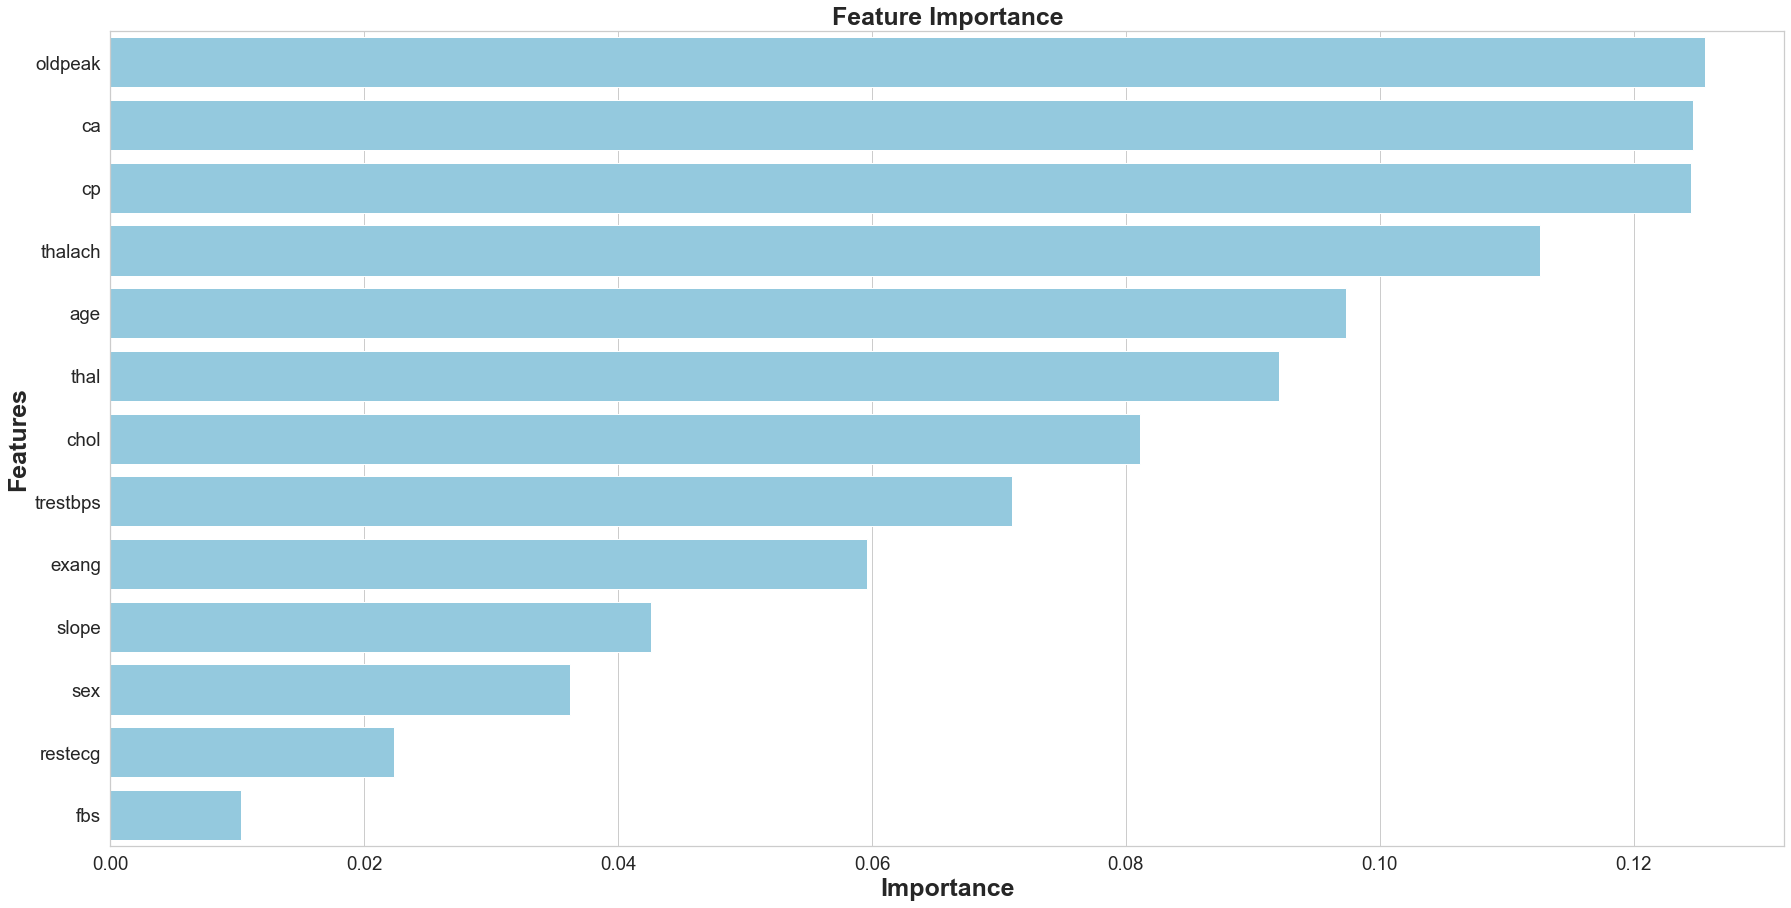

None

,Features,Gini-Importance
0,oldpeak,0.125598
1,ca,0.124663
2,cp,0.124546
3,thalach,0.112625
4,age,0.097329
5,thal,0.092097
6,chol,0.081130
7,trestbps,0.071041
8,exang,0.059571
9,slope,0.042554


In [48]:
feats = {}
for feature, importance in zip(df.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

## Light Gradient Boosting Machine (LightGBM) (boosting)

In [49]:
!pip install lightgbm

In [50]:
from lightgbm import LGBMClassifier

In [51]:
lgbm = LGBMClassifier()
lgbm

LGBMClassifier()

In [52]:
lgbm.fit(x_train, y_train,
        eval_set=[(x_valid, y_valid)],
        early_stopping_rounds=100)

[1]	valid_0's binary_logloss: 0.635475
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.600932
[3]	valid_0's binary_logloss: 0.558895
[4]	valid_0's binary_logloss: 0.533877
[5]	valid_0's binary_logloss: 0.511335
[6]	valid_0's binary_logloss: 0.479218
[7]	valid_0's binary_logloss: 0.461173
[8]	valid_0's binary_logloss: 0.443631
[9]	valid_0's binary_logloss: 0.427735
[10]	valid_0's binary_logloss: 0.415035
[11]	valid_0's binary_logloss: 0.400308
[12]	valid_0's binary_logloss: 0.387037
[13]	valid_0's binary_logloss: 0.380598
[14]	valid_0's binary_logloss: 0.371369
[15]	valid_0's binary_logloss: 0.362054
[16]	valid_0's binary_logloss: 0.357166
[17]	valid_0's binary_logloss: 0.350167
[18]	valid_0's binary_logloss: 0.344536
[19]	valid_0's binary_logloss: 0.34087
[20]	valid_0's binary_logloss: 0.333378
[21]	valid_0's binary_logloss: 0.330504
[22]	valid_0's binary_logloss: 0.323542
[23]	valid_0's binary_logloss: 0.321978
[24]	valid_0's binary_loglos

LGBMClassifier()

In [53]:
pred_lgbm = lgbm.predict(x_valid, num_iteration=lgbm.best_iteration_)

In [54]:
pred_lgbm

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [55]:
acc_lgbm=accuracy_score(y_valid, pred_lgbm)
pre_lgbm=precision_score(y_valid, pred_lgbm)
rec_lgbm=recall_score(y_valid, pred_lgbm)

In [56]:
print('accuracy: ', acc_lgbm , '\n', 'Precision: ', pre_lgbm, '\n', 'Recall: ', rec_lgbm)

accuracy:  0.9032258064516129 
 Precision:  0.9 
 Recall:  0.9473684210526315


## Stacking

In [57]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

In [58]:
estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]

In [59]:
modelclf = StackingClassifier(estimators=estimators, final_estimator = SVC())

In [60]:
modelclf.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=SVC())

In [61]:
pred_modelclf=modelclf.predict(x_valid)

In [62]:
pred_modelclf

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [63]:
acc_modelclf=accuracy_score(y_valid, pred_modelclf)
pre_modelclf=precision_score(y_valid, pred_modelclf)
rec_modelclf=recall_score(y_valid, pred_modelclf)

In [64]:
print('accuracy: ', acc_modelclf , '\n', 'Precision: ', pre_modelclf, '\n', 'Recall: ', rec_modelclf)

accuracy:  0.8709677419354839 
 Precision:  0.8571428571428571 
 Recall:  0.9473684210526315


# KMeans

In [65]:
from sklearn.cluster import KMeans

In [66]:
kmeans = KMeans(n_clusters=2, random_state=3)

In [67]:
x_kmeans = x.iloc[:].values

In [68]:
x_kmeans

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [69]:
y_kmeans=kmeans.fit_predict(x_kmeans)

In [70]:
centroids = kmeans.cluster_centers_

In [71]:
print(kmeans.labels_)

[0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0
 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0
 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0]


In [72]:
y_kmeans

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


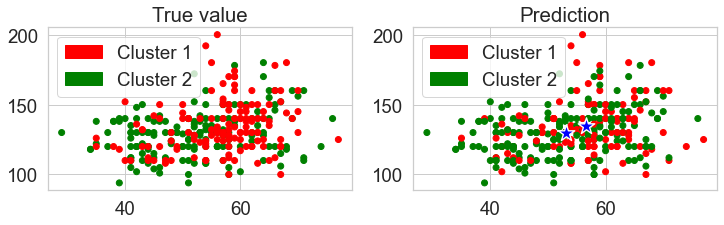

In [76]:
import matplotlib.patches as mpatches
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green'])
iris_targets_legend = np.array(df.target)
red_patch = mpatches.Patch(color='red', label='Cluster 1')
green_patch = mpatches.Patch(color='green', label='Cluster 2')

predictedY = np.choose(kmeans.labels_, [1, 0]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['age'], x['trestbps'], c=colors[y])
plt.title('True value')
plt.legend(handles=[red_patch, green_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['age'], x['trestbps'], c=colors[predictedY])
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], color = 'blue', 
                label = 'Centroids',s=300,marker='*')
plt.title("Prediction")
plt.legend(handles=[red_patch, green_patch])

# PCA 

In [77]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [78]:
x_meaned = x - np.mean(x, axis=0)

In [79]:
cov_mat = np.cov(x_meaned, rowvar=False)

In [80]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)


In [81]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [82]:
n_components = 2 
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [83]:
x_reduced = np.dot(eigenvector_subset.transpose(),x_meaned.transpose()).transpose()

In [84]:
x_reduced

array([[ 1.22673448e+01,  2.87383781e+00],
       [-2.69013712e+00, -3.98713736e+01],
       [ 4.29502141e+01, -2.36368199e+01],
       [ 1.09447564e+01, -2.84380358e+01],
       [-1.06979053e+02, -1.58744678e+01],
       [ 5.36472038e+01,  4.00392377e+00],
       [-4.80821551e+01, -3.03896086e+00],
       [-1.55660590e+01, -2.62745637e+01],
       [ 4.54388962e+01, -7.42977739e+00],
       [ 7.73163161e+01, -1.99100759e+01],
       [ 6.94323738e+00, -9.17536374e+00],
       [-2.84259379e+01,  8.47126467e+00],
       [-1.92477377e+01, -2.24212575e+01],
       [ 3.58055558e+01,  5.70343964e+00],
       [-3.75886896e+01, -1.02579437e+01],
       [ 2.79998518e+01, -9.64570379e+00],
       [-9.29750393e+01, -2.42584272e+01],
       [ 1.86307973e+01,  3.92597411e+01],
       [-1.00245407e+00, -2.10404091e+01],
       [ 6.28419048e+00,  2.34469473e+00],
       [ 1.19811457e+01, -9.66308502e+00],
       [ 1.39453649e+01, -3.05172542e+01],
       [ 2.05255102e+01, -2.87200024e+01],
       [ 2.

In [85]:
def PCA(X , num_components):
    
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
    
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
    
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    
    return X_reduced


In [86]:
mat_reduced = PCA(x, 13)

In [87]:
principal_df = pd.DataFrame(mat_reduced , columns = ['age','sex','cp','trtbps', 'chol','fbs', 'restecg', 'thalachh','exng','oldpeak','slp','caa','thall'])

<AxesSubplot:xlabel='age', ylabel='trtbps'>

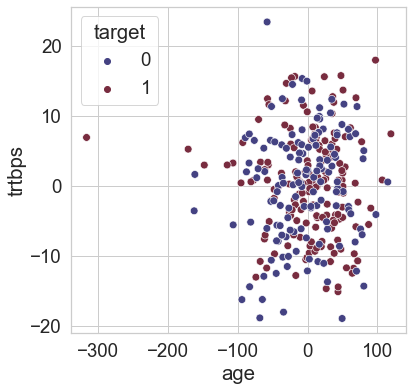

In [88]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = principal_df , x = 'age',y = 'trtbps' , hue = y , s = 60 , palette= 'icefire')

<AxesSubplot:xlabel='age', ylabel='trestbps'>

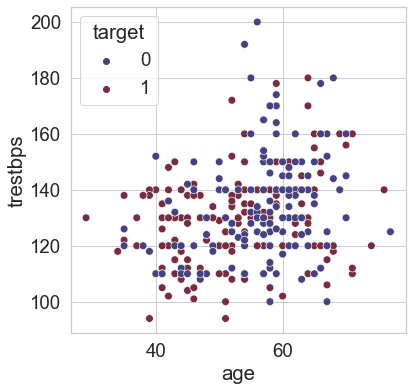

In [90]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df , x = 'age',y = 'trestbps' , hue = y , s = 60 , palette= 'icefire')